In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 66.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 65.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/train.csv')

In [5]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"gold settles higher recent downdraft, inflatio...",0.283333,0.116667,Positive
1,1,gloves wedding lace ivory bridalgown weddingdr...,0.600000,0.500000,Positive
2,2,boston happening tomorrow _music!! tickets now...,0.602273,-0.306818,Negative
3,3,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 4,784,000円 買取 4,7...",0.000000,0.000000,Neutral
4,4,"gold gains 1 percent dollar retreat, short-cov...",0.000000,0.000000,Neutral


In [6]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/test.csv')

In [7]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,40000,✅awax - finacial blockchain 💰💰💰 innovative wid...,0.666667,0.066667,Positive
1,40001,juuusssttt hair center (say like bob uecker ma...,0.255556,-0.068056,Negative
2,40002,"los videojuegos son vicio caro, asíque os trae...",0.750000,0.375000,Positive
3,40003,cryptocurrency price analysis bitsend bsd : ⬇️...,0.677273,-0.331818,Negative
4,40004,god trust pay cash! deadpresidents cash coin,0.000000,0.000000,Neutral


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [9]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [10]:
# Building model with transformer
model_name = 'bert-base-multilingual-uncased'

trans = text.Transformer(model_name, maxlen=128)

In [11]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 33
	99percentile : 46


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 34
	99percentile : 34


In [12]:
# getting mbert-base model.
model = trans.get_classifier()

In [13]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [14]:
history = learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
2500/2500 [==============================] - 1154s 452ms/step - loss: 0.1632 - accuracy: 0.9424 - val_loss: 0.5033 - val_accuracy: 0.8788
Epoch 2/5
2500/2500 [==============================] - 1134s 451ms/step - loss: 0.1118 - accuracy: 0.9620 - val_loss: 0.9419 - val_accuracy: 0.5486
Epoch 3/5
2500/2500 [==============================] - 1133s 450ms/step - loss: 0.7749 - accuracy: 0.6825 - val_loss: 0.9747 - val_accuracy: 0.6473
Epoch 4/5
2500/2500 [==============================] - 1132s 450ms/step - loss: 1.0064 - accuracy: 0.4595 - val_loss: 0.9907 - val_accuracy: 0.4732
Epoch 5/5
2500/2500 [==============================] - 1131s 450ms/step - loss: 1.0144 - accuracy: 0.4537 - val_loss: 0.9891 - val_accuracy: 0.4732


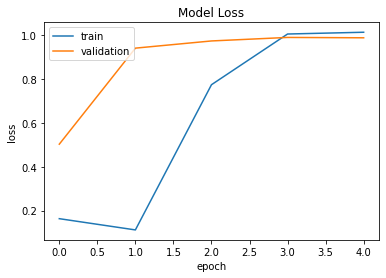

In [15]:
learner.plot('loss')

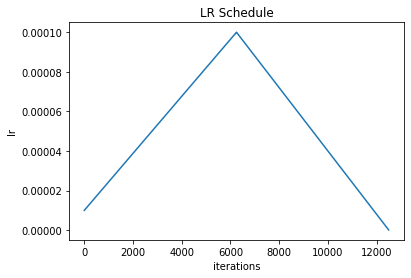

In [16]:
learner.plot('lr')

In [17]:
learner.validate()

175/175 [==============================] - 40s 215ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       736
           1       0.47      1.00      0.64      2650
           2       0.00      0.00      0.00      2214

    accuracy                           0.47      5600
   macro avg       0.16      0.33      0.21      5600
weighted avg       0.22      0.47      0.30      5600



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[   0,  736,    0],
       [   0, 2650,    0],
       [   0, 2214,    0]])

In [18]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [19]:
y_pred = predictor.predict(X_test)

175/175 [==============================] - 37s 213ms/step
